<a href="https://colab.research.google.com/github/OliverTuah/Project-Forecasting-Prophet/blob/main/Forecasting_Wisata_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install pystan fbprophet

In [ ]:
import pandas as pd
import matplotlib as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

In [ ]:
df=pd.read_csv('/content/DataBulanan.csv')
df.head()

,Tanggal,Kunjungan
0,2010-01-01,49379900
1,2010-02-01,52313500
2,2010-03-01,59424200
3,2010-04-01,55591500
4,2010-05-01,60003100


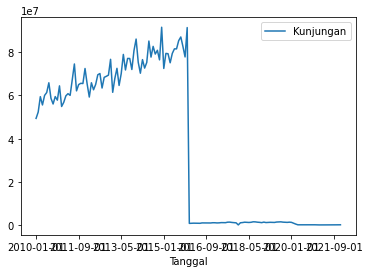

In [ ]:
df.plot(x='Tanggal',y='Kunjungan')

In [ ]:
print(df['Tanggal'].unique())
print(df['Kunjungan'].unique())

['2010-01-01' '2010-02-01' '2010-03-01' '2010-04-01' '2010-05-01'
 '2010-06-01' '2010-07-01' '2010-08-01' '2010-09-01' '2010-10-01'
 '2010-11-01' '2010-12-01' '2011-01-01' '2011-02-01' '2011-03-01'
 '2011-04-01' '2011-05-01' '2011-06-01' '2011-07-01' '2011-08-01'
 '2011-09-01' '2011-10-01' '2011-11-01' '2011-12-01' '2012-01-01'
 '2012-02-01' '2012-03-01' '2012-04-01' '2012-05-01' '2012-06-01'
 '2012-07-01' '2012-08-01' '2012-09-01' '2012-10-01' '2012-11-01'
 '2012-12-01' '2013-01-01' '2013-02-01' '2013-03-01' '2013-04-01'
 '2013-05-01' '2013-06-01' '2013-07-01' '2013-08-01' '2013-09-01'
 '2013-10-01' '2013-11-01' '2013-12-01' '2014-01-01' '2014-02-01'
 '2014-03-01' '2014-04-01' '2014-05-01' '2014-06-01' '2014-07-01'
 '2014-08-01' '2014-09-01' '2014-10-01' '2014-11-01' '2014-12-01'
 '2015-01-01' '2015-02-01' '2015-03-01' '2015-04-01' '2015-05-01'
 '2015-06-01' '2015-07-01' '2015-08-01' '2015-09-01' '2015-10-01'
 '2015-11-01' '2015-12-01' '2016-01-01' '2016-02-01' '2016-03-01'
 '2016-04-

In [ ]:
df.dtypes

Tanggal      object
Kunjungan     int64
dtype: object

# Modelling

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.head()

,Tanggal,Kunjungan
0,2010-01-01,49379900
1,2010-02-01,52313500
2,2010-03-01,59424200
3,2010-04-01,55591500
4,2010-05-01,60003100


In [ ]:
df.columns =('ds', 'y')
df.tail()

,ds,y
139,2021-08-01,118533
140,2021-09-01,120100
141,2021-10-01,146137
142,2021-11-01,150577
143,2021-12-01,163619


In [ ]:
m=Prophet(interval_width=0.95, seasonality_mode='multiplicative')
model=m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
504,2022-11-27,-2.284547e+07,-6.660758e+07,1.229836e+07,-2.321348e+07,-2.250838e+07,0.182436,0.182436,0.182436,0.182436,0.182436,0.182436,0.0,0.0,0.0,-2.701330e+07
505,2022-11-28,-2.286953e+07,-6.825104e+07,1.285304e+07,-2.323859e+07,-2.253089e+07,0.189235,0.189235,0.189235,0.189235,0.189235,0.189235,0.0,0.0,0.0,-2.719724e+07
506,2022-11-29,-2.289359e+07,-6.490474e+07,9.825801e+06,-2.326371e+07,-2.255340e+07,0.193906,0.193906,0.193906,0.193906,0.193906,0.193906,0.0,0.0,0.0,-2.733280e+07
507,2022-11-30,-2.291765e+07,-6.841615e+07,1.380664e+07,-2.328882e+07,-2.257591e+07,0.196253,0.196253,0.196253,0.196253,0.196253,0.196253,0.0,0.0,0.0,-2.741530e+07
508,2022-12-01,-2.294171e+07,-6.867775e+07,1.455196e+07,-2.331478e+07,-2.259842e+07,0.196122,0.196122,0.196122,0.196122,0.196122,0.196122,0.0,0.0,0.0,-2.744110e+07


In [ ]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2010-01-01,6.572874e+07
1,2010-02-01,6.695577e+07
2,2010-03-01,7.238624e+07
3,2010-04-01,6.892239e+07
4,2010-05-01,7.222738e+07
...,...,...
504,2022-11-27,-2.701330e+07
505,2022-11-28,-2.719724e+07
506,2022-11-29,-2.733280e+07
507,2022-11-30,-2.741530e+07


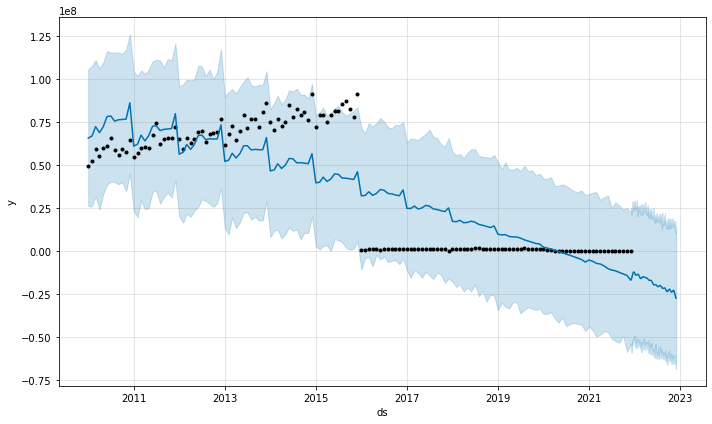

In [ ]:
plot=m.plot(forecast)

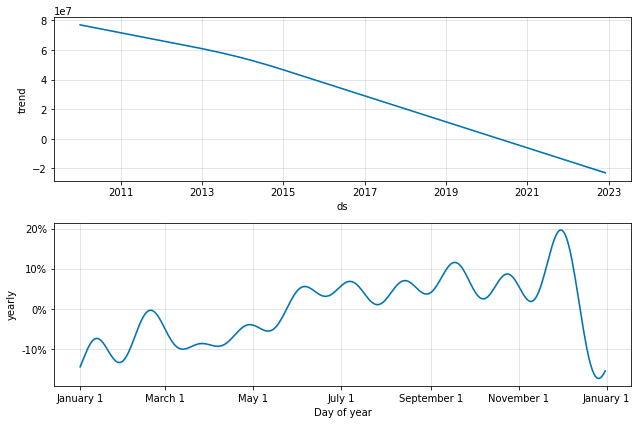

In [ ]:
plot2=m.plot_components(forecast)

# Evaluasi

In [ ]:
df_cv = cross_validation(m, initial='1825 days', period='2000 days', horizon='365 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 2 forecasts with cutoffs between 2015-06-11 00:00:00 and 2020-12-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,1.001510e+14,1.000755e+07,9.977985e+06,42.528251,42.528251,0.5
1,51 days,5.846282e+13,7.646098e+06,5.972380e+06,42.478798,42.478798,1.0
2,62 days,6.840066e+13,8.270469e+06,6.416404e+06,54.997573,54.997573,1.0
3,82 days,7.937241e+13,8.909119e+06,8.234933e+06,55.018329,55.018329,1.0
4,90 days,1.003676e+14,1.001836e+07,9.076348e+06,55.527118,55.527118,1.0
